In [2]:
import rasterio
from osgeo import gdal
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import datetime

In [3]:
ue = rasterio.open("C:/Users/crowk/Downloads/final_ccdc_export_ue.tif")
cc = rasterio.open("C:/Users/crowk/Downloads/final_ccdc_export_cc.tif")

UeArr = ue.read()
CcArr = cc.read()

## Choose where to do analysis
location = UeArr

b, h, l = location.shape
print(location.shape)
print(b,h,l)
print(location)

#print(location[:,206,151])

(532, 167, 227)
532 167 227
[[[2.00000000e+00 5.00000000e+00 4.00000000e+00 ... 4.00000000e+00
   1.00000000e+00 1.00000000e+00]
  [4.00000000e+00 3.00000000e+00 2.00000000e+00 ... 4.00000000e+00
   4.00000000e+00 1.00000000e+00]
  [4.00000000e+00 3.00000000e+00 2.00000000e+00 ... 3.00000000e+00
   3.00000000e+00 4.00000000e+00]
  ...
  [3.00000000e+00 2.00000000e+00 1.00000000e+00 ... 3.00000000e+00
   3.00000000e+00 1.00000000e+00]
  [3.00000000e+00 3.00000000e+00 1.00000000e+00 ... 5.00000000e+00
   2.00000000e+00 4.00000000e+00]
  [2.00000000e+00 3.00000000e+00 1.00000000e+00 ... 1.00000000e+00
   4.00000000e+00 3.00000000e+00]]

 [[6.28836139e+11 6.63395959e+11 6.28836139e+11 ... 6.63395959e+11
   6.63395959e+11 6.28836139e+11]
  [6.28836139e+11 6.28836139e+11 6.63395959e+11 ... 6.63395959e+11
   6.63395959e+11 6.63395959e+11]
  [6.28836139e+11 6.63395959e+11 6.63395959e+11 ... 6.28836139e+11
   6.28836139e+11 6.63395959e+11]
  ...
  [6.28836139e+11 6.28836139e+11 6.28836139e+11 .

IndexError: index 206 is out of bounds for axis 1 with size 167

In [4]:
# user input for pixel 
#BOUNDS for UE are width: 227 and height: 167
#BOUNDS for CC are width: 292 and height: 203
x,y = 100,100

#write func to convert lat/lon to row/col, take CRS into account, set bounds

#iterate through each band at specified pixel point
if location is UeArr:
    x_y_only = np.array(UeArr[1:,x,y])
    loc_label = 'Urbanizing Edge'
else:
    x_y_only = np.array(CcArr[1:,x,y])
    loc_label = 'City Center'

In [5]:
iter_UeArr = UeArr[0,:,:]
print(iter_UeArr)
UE_df = []

print(enumerate(iter_UeArr))

[[2. 5. 4. ... 4. 1. 1.]
 [4. 3. 2. ... 4. 4. 1.]
 [4. 3. 2. ... 3. 3. 4.]
 ...
 [3. 2. 1. ... 3. 3. 1.]
 [3. 3. 1. ... 5. 2. 4.]
 [2. 3. 1. ... 1. 4. 3.]]


In [6]:
for col in enumerate(iter_UeArr[:0]):
    for row in enumerate(iter_UeArr[0:]):
        new_col = UeArr[1:,col,row]
        print(new_col)
        UE_df.append(new_col)

UE_df = pd.DataFrame(UE_df)
UE_df.head()

""


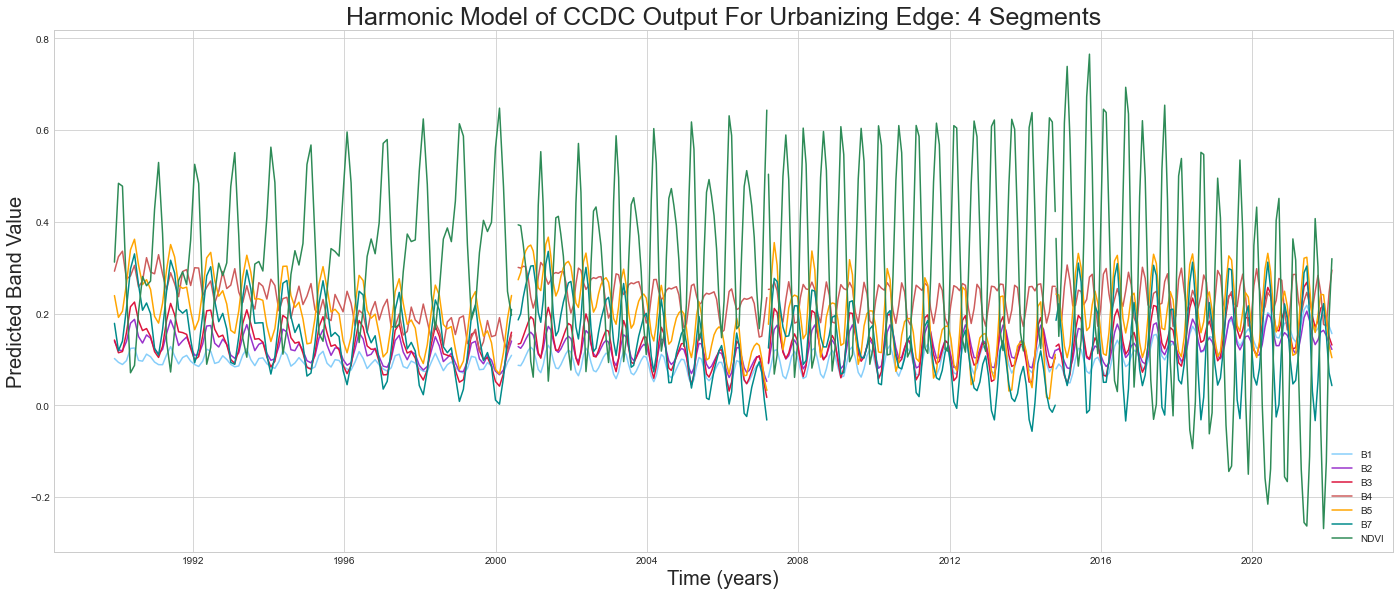

In [8]:
plt.style.use('seaborn-whitegrid') # Set the aesthetic style of the plots
fig, ax = plt.subplots(figsize=(24,9.6))

pi = math.pi
#%matplotlib

#counter for EACH BAND- goes up every time a value is stored
b = 0
#counter for coeficients- goes up only when a new coefficient is stored
i=0

#start a segment counter to use in plot title for clarity
seg_no = 1

#color tracker
color = 0
        

for val in x_y_only:
    if math.isnan(val) is False:
            if b % 59 == 0:
            #get tstart value for t
                tStart = val
                if b != 0:
                    # uncomment the following line if you're having trouble visualizing breaks;
                    #it will add a marker at each break
                  #  plt.axvline(x=tStart,color='black')
               #increment seg count at start of each band
                    seg_no = seg_no +1
                b = b+1
        #the following conditions go through the 8 different coeficients and build the model for each segment and band
            elif b % 59 ==1:
                tEnd = val
                b = b+1
            elif b% 59 ==2:
                b = b+1
            elif i % 8 == 0:
                intp = val
                b = b+1
                i = i+1
            elif i % 8 == 1: 
                slp = val
                b = b+1
                i = i+1
            elif i%8 == 2:
                cos = val
                b = b+1
                i = i+1
            elif i%8 == 3:
                sin = val
                b = b+1
                i = i+1
            elif i%8 == 4:
                cos2 = val
                b = b+1
                i = i+1
            elif i%8 == 5:
                sin2 = val
                b = b+1
                i = i+1
            elif i%8 == 6:
                cos3 = val
                b = b+1
                i = i+1
            elif i%8 == 7:
                sin3 = val
                b = b+1
            #determine actual start and end dates from unix time and allot an array for calculations (t) 
            #as well as an array for plotting (t_start)
                t = np.linspace(tStart, tEnd, 100)
                start = pd.Timestamp(datetime.datetime.fromtimestamp((tStart)/1000).date())
                end = pd.Timestamp(datetime.datetime.fromtimestamp((tEnd)/1000).date())
                t_plot = np.linspace(start.value, end.value,100)
                t_plot = pd.to_datetime(t_plot)
            #build and plot model!
                omega = (2*pi*(1/(1000 * 60 * 60 * 24 * 365.25)))*t
                model = intp + slp * t + cos*np.cos(omega) + sin*np.sin(omega)+cos2*np.cos(2*omega)+sin2*np.sin(2*omega)+ cos3*np.cos(3*omega)+ sin3*np.sin(3*omega)
                #make sure band colors are consistent across time segments!
                if color == 0:
                    col = 'lightskyblue'
                elif color ==1:
                    col = 'darkorchid'
                elif color ==2:
                    col = 'crimson'
                elif color ==3:
                    col = 'indianred'
                elif color ==4:
                    col = 'orange'
                elif color ==5:
                    col = 'darkcyan'
                elif color ==6:
                    col = 'seagreen'
                plt.plot(t_plot,model,color = col)
                i=i+1
                if color<6:
                    color = color+1
                else:
                    color = 0
            else:
                break
    else:
           break
    
#Do some formatting and show final plot
plt.title('Harmonic Model of CCDC Output For ' + loc_label +': ' + str(seg_no) + ' Segments',fontsize = 25)
plt.xlabel('Time (years)',fontsize = 20)
plt.ylabel('Predicted Band Value',fontsize = 20)
plt.legend(['B1','B2','B3','B4','B5','B7','NDVI'],loc = 'lower right')         
plt.show()
